Import relevant packages here.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


Load the data and verify it is loaded correctly.
<ul>
    <li>Print it (head, tail, or specific rows, choose a sensible number of rows).</li>
    <li>Compare it to the source file.</li>
<ul>

In [2]:

# Specify the path to your CSV file
file_path = "C:/Users/ahmad/Downloads/cf_data.csv"
data = pd.read_csv(file_path, encoding='ISO-8859-1')

# Verify the data
print("First 5 rows:")
print(data.head())

print("\nLast 5 rows:")
print(data.tail())

# Verify Specific Data:
print("\nRows 10 to 15:")
print(data.iloc[10:16])



First 5 rows:
         dv        s         a
0 -0.743240  53.5427  1.242570
1 -0.557230  53.6120  1.777920
2 -0.454769  53.6541  0.544107
3 -0.525396  53.7030 -0.294755
4 -0.601285  53.7592 -0.290961

Last 5 rows:
            dv        s         a
73903  5.19874  116.139 -0.795081
73904  5.10428  115.627 -0.314263
73905  5.13764  115.118  0.232283
73906  5.15348  114.599  0.262078
73907  5.25868  113.112 -0.612440

Rows 10 to 15:
          dv        s         a
10 -0.423120  54.1830  0.132934
11 -0.482842  54.2282 -0.036750
12 -0.546495  54.2796  0.252901
13 -0.666451  54.3375  1.016250
14 -0.889424  54.4128  1.348450
15 -1.077630  54.5154  0.801785


In the ensuing, you will use <code>numpy</code>.

Let's create a grid for the values to plot. But first create <b>two arrays named <code>dv</code> and <code>s</code></b> using <code>numpy.linspace</code> that hold the grid values at the relevant indices in their respective dimension of the grid.

Create a <b>grid named <code>a</code></b> with zeros using <code>numpy.zeros</code> in to which calculated acceleration values can be stored.<br>
<br>
Let the grid span:<br>
<ul>
    <li>Speed difference <code>dv</code> [m/s]
        <ul>
            <li>From -10 till 10</li>
            <li>With 41 evenly spaced values</li>
        </ul>
    </li>
    <li>Headway <code>s</code> [m]
        <ul>
            <li>From 0 till 200</li>
            <li>With 21 evenly spaced values</li>
        </ul>
    </li>
</ul>

In [3]:


# Define the parameters for the grid
dv_start = -10  # Starting speed difference (m/s)
dv_end = 10     # Ending speed difference (m/s)
dv_count = 41   # Number of evenly spaced values for speed difference

s_start = 0     # Starting headway (m)
s_end = 200     # Ending headway (m)
s_count = 21    # Number of evenly spaced values for headway

# Create the arrays using numpy.linspace
dv = np.linspace(dv_start, dv_end, dv_count)
s = np.linspace(s_start, s_end, s_count)

# Create the grid 'a' with zeros
a = np.zeros((dv_count, s_count))



Create from the imported data 3 separate <code>numpy</code> arrays for each column <code>dv</code>, <code>s</code> and <code>a</code>. (We do this for speed reasons later.)
<ul>
    <li>Make sure to name them differently from the arrays that belong to the grid as above.</li>
    <li>You can access the data of each column in a <code>DataFrame</code> using <code>data.xxx</code> where <code>xxx</code> is the column name (not as a string).</li>
    <li>Use the method <code>to_numpy()</code> to convert a column to a <code>numpy</code> array.</li>
</ul>

In [5]:
dv_data = data['dv'].to_numpy()
s_data = data['s'].to_numpy()
a_data = data['a'].to_numpy()

Create an algorithm that calculates all the acceleration values and stores them in the grid. The algorithm is described visually in the last part of the lecture. At each grid point, it calculates a weighted mean of all measurements. The weights are given by an exponential function, based on the 'distance' between the grid point, and the measurement values of <code>dv</code> and <code>s</code>. To get you started, how many <code>for</code>-loops do you need?<br>
<br>
For this you will need <code>math</code>.<br>
Use an <i>upsilon</i> of 1.5m/s and a <i>sigma</i> of 30m.<br>
<br>
<b>Warning:</b> This calculation may take some time. So:
<ul>
    <li>Print a line for each iteration of the outer-most <code>for</code>-loop that shows you the progress.</li>
    <li>Test you code by running it only on the first 50 measurements of the data.</li>
</ul>

In [6]:

# Define the parameters for the exponential function
upsilon = 1.5  # Upsilon for the exponential function
sigma = 30     # Sigma for the exponential function

# Iterate over each grid point and calculate the acceleration
total_iterations = dv_count * s_count
for i in range(dv_count):
    for j in range(s_count):
        progress = (i * s_count + j + 1) / total_iterations * 100
        print(f"Progress: {progress:.2f}%")
        
        # Calculate the weighted mean
        weighted_sum = 0
        total_weight = 0
        for k in range(len(dv_data)):
            weight = math.exp(
                -((dv[i] - dv_data[k])**2 + (s[j] - s_data[k])**2) / (2 * sigma**2)
            )
            weighted_sum += a_data[k] * weight
            total_weight += weight
        if total_weight == 0:
            a[i, j] = 0
        else:
            a[i, j] = weighted_sum / total_weight

# Now, the 'a' grid contains the calculated acceleration values based on the weighted mean.


Progress: 0.12%
Progress: 0.23%
Progress: 0.35%
Progress: 0.46%
Progress: 0.58%
Progress: 0.70%
Progress: 0.81%
Progress: 0.93%
Progress: 1.05%
Progress: 1.16%
Progress: 1.28%
Progress: 1.39%
Progress: 1.51%
Progress: 1.63%
Progress: 1.74%
Progress: 1.86%
Progress: 1.97%
Progress: 2.09%
Progress: 2.21%
Progress: 2.32%
Progress: 2.44%
Progress: 2.56%
Progress: 2.67%
Progress: 2.79%
Progress: 2.90%
Progress: 3.02%
Progress: 3.14%
Progress: 3.25%
Progress: 3.37%
Progress: 3.48%
Progress: 3.60%
Progress: 3.72%
Progress: 3.83%
Progress: 3.95%
Progress: 4.07%
Progress: 4.18%
Progress: 4.30%
Progress: 4.41%
Progress: 4.53%
Progress: 4.65%
Progress: 4.76%
Progress: 4.88%
Progress: 4.99%
Progress: 5.11%
Progress: 5.23%
Progress: 5.34%
Progress: 5.46%
Progress: 5.57%
Progress: 5.69%
Progress: 5.81%
Progress: 5.92%
Progress: 6.04%
Progress: 6.16%
Progress: 6.27%
Progress: 6.39%
Progress: 6.50%
Progress: 6.62%
Progress: 6.74%
Progress: 6.85%
Progress: 6.97%
Progress: 7.08%
Progress: 7.20%
Progress

Progress: 56.79%
Progress: 56.91%
Progress: 57.03%
Progress: 57.14%
Progress: 57.26%
Progress: 57.38%
Progress: 57.49%
Progress: 57.61%
Progress: 57.72%
Progress: 57.84%
Progress: 57.96%
Progress: 58.07%
Progress: 58.19%
Progress: 58.30%
Progress: 58.42%
Progress: 58.54%
Progress: 58.65%
Progress: 58.77%
Progress: 58.89%
Progress: 59.00%
Progress: 59.12%
Progress: 59.23%
Progress: 59.35%
Progress: 59.47%
Progress: 59.58%
Progress: 59.70%
Progress: 59.81%
Progress: 59.93%
Progress: 60.05%
Progress: 60.16%
Progress: 60.28%
Progress: 60.39%
Progress: 60.51%
Progress: 60.63%
Progress: 60.74%
Progress: 60.86%
Progress: 60.98%
Progress: 61.09%
Progress: 61.21%
Progress: 61.32%
Progress: 61.44%
Progress: 61.56%
Progress: 61.67%
Progress: 61.79%
Progress: 61.90%
Progress: 62.02%
Progress: 62.14%
Progress: 62.25%
Progress: 62.37%
Progress: 62.49%
Progress: 62.60%
Progress: 62.72%
Progress: 62.83%
Progress: 62.95%
Progress: 63.07%
Progress: 63.18%
Progress: 63.30%
Progress: 63.41%
Progress: 63.5

The following code will plot the data for you. Does it make sense when considering:
<ul>
    <li>Negative (slower than leader) and positive (faster than leader) speed differences?</li>
    <li>Small and large headways?</li>
</ul>

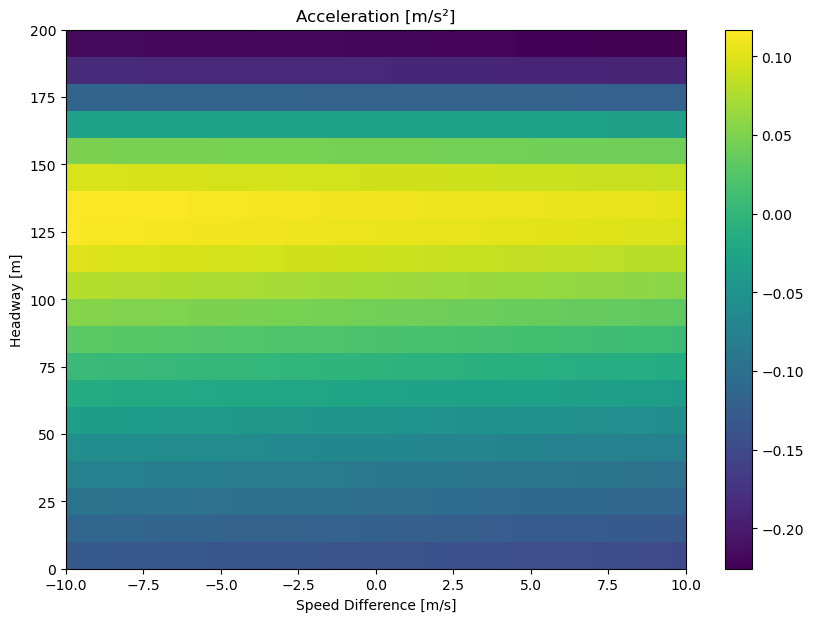

In [10]:

# Assuming you have already defined dv, s, and a as mentioned earlier

# Create a figure and axes
fig, axs = plt.subplots(figsize=(10, 7))

# Create the pseudocolor plot
p = axs.pcolormesh(dv, s, a.T, shading='flat')

# Transpose 'a' to match dimensions with 'X' and 'Y'

# Set the title and axis labels
axs.set_title('Acceleration [m/s²]')
axs.set_xlabel('Speed Difference [m/s]')
axs.set_ylabel('Headway [m]')

# Add a colorbar to the plot
cbar = fig.colorbar(p)

# Show the plot
plt.show()
